In [1]:
from scipy import stats
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
import requests
import seaborn as sns 
import pandas as pd 
import numpy as np 

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

>
> ### **STEP PROJECT**
>> #### *IKEA DATASET*
>>

In [3]:
URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

req = requests.get(URL)

In [4]:
match req.status_code:
    case 200: 
        df = pd.read_csv(URL)
    case 404: 
        raise 'Problem with connection'
    case _ :
        raise f'Something wrong {req.status_code}'

>
> #### **EDA**
>

In [5]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [6]:
df.tail()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [14]:
print(df.describe())


        Unnamed: 0        price        depth       height        width
count  3694.000000  3694.000000  2231.000000  2706.000000  3105.000000
mean   1846.500000  1078.208419    54.379202   101.679970   104.470853
std    1066.510275  1374.652494    29.958351    61.097585    71.133771
min       0.000000     3.000000     1.000000     1.000000     1.000000
25%     923.250000   180.900000    38.000000    67.000000    60.000000
50%    1846.500000   544.700000    47.000000    83.000000    80.000000
75%    2769.750000  1429.500000    60.000000   124.000000   140.000000
max    3693.000000  9585.000000   257.000000   700.000000   420.000000


In [8]:
df = df.drop(['item_id', 'link'], axis= 1)
df.columns

Index(['Unnamed: 0', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'other_colors', 'short_description', 'designer',
       'depth', 'height', 'width'],
      dtype='object')

In [15]:
df.isnull().sum()

Unnamed: 0              0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

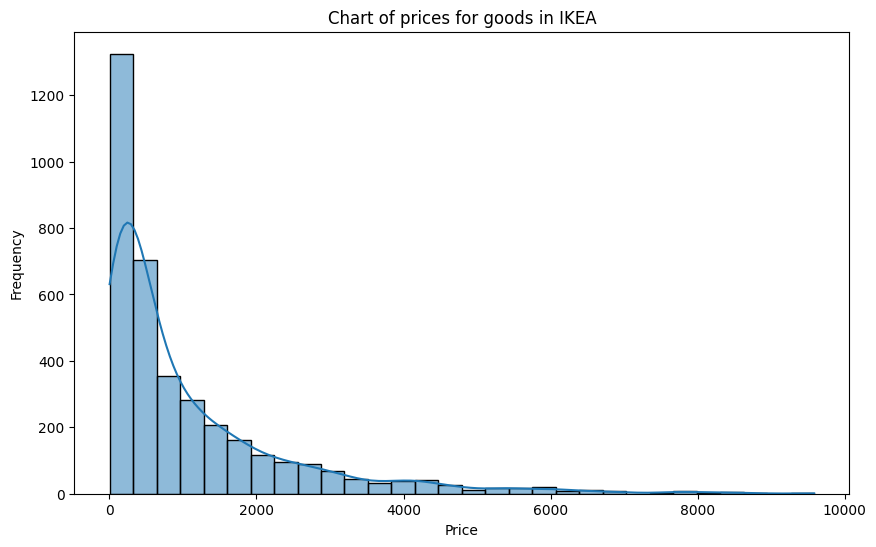

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Chart of prices for goods in IKEA')
plt.show()

[Text(0, 0, 'Bar furniture'),
 Text(1, 0, 'Beds'),
 Text(2, 0, 'Bookcases & shelving units'),
 Text(3, 0, 'Cabinets & cupboards'),
 Text(4, 0, 'Café furniture'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Chests of drawers & drawer units'),
 Text(7, 0, "Children's furniture"),
 Text(8, 0, 'Nursery furniture'),
 Text(9, 0, 'Outdoor furniture'),
 Text(10, 0, 'Room dividers'),
 Text(11, 0, 'Sideboards, buffets & console tables'),
 Text(12, 0, 'Sofas & armchairs'),
 Text(13, 0, 'Tables & desks'),
 Text(14, 0, 'Trolleys'),
 Text(15, 0, 'TV & media furniture'),
 Text(16, 0, 'Wardrobes')]

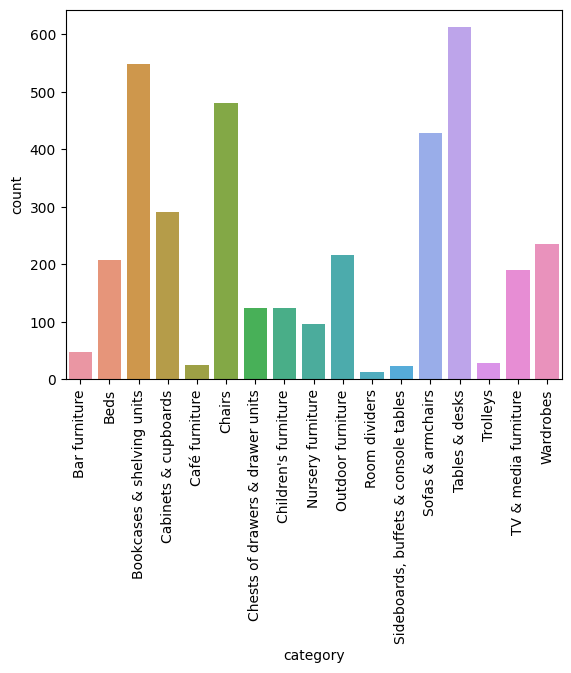

In [20]:
sns.countplot(x = df['category']).set_xticklabels(df['category'].unique(), rotation = 90)

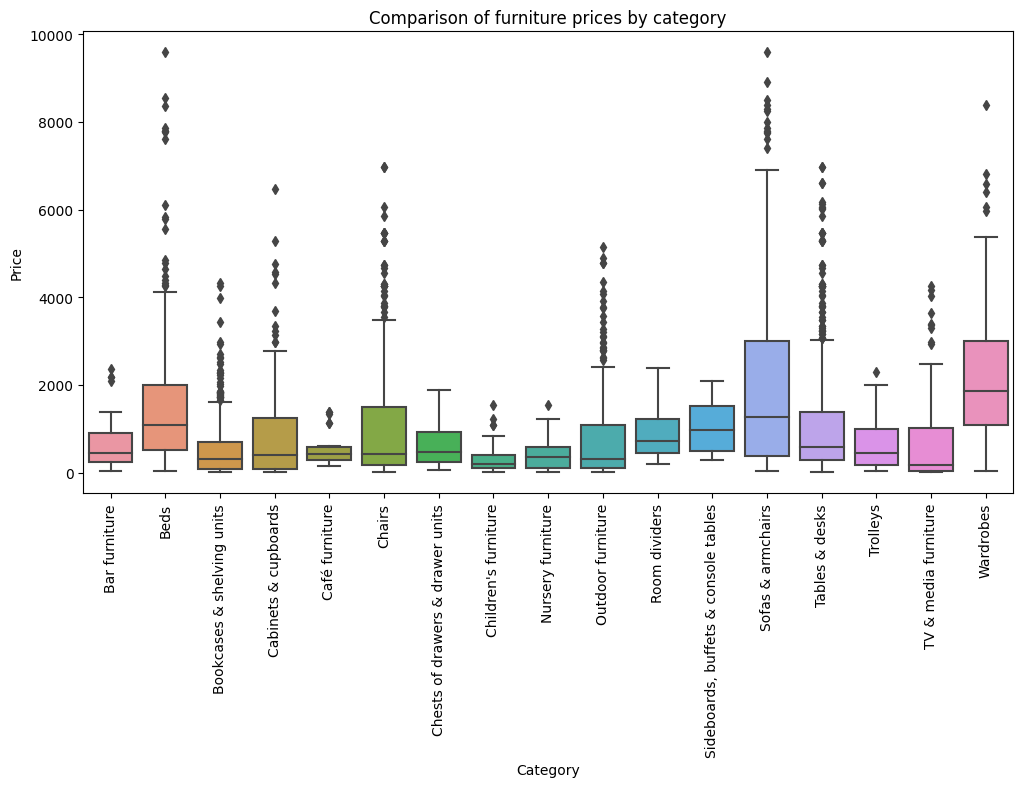

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='price', data=df)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Comparison of furniture prices by category')
plt.xticks(rotation=90)
plt.show()

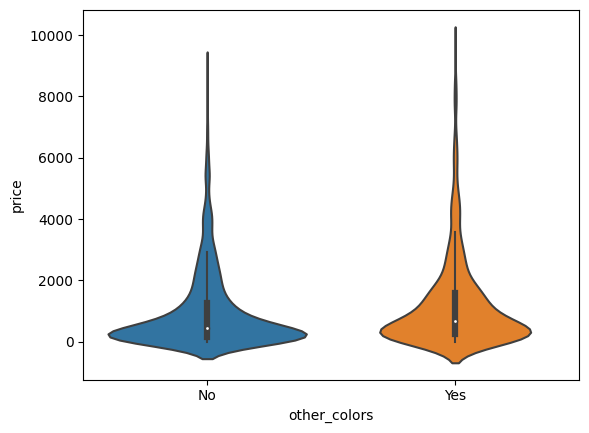

In [22]:
sns.violinplot(data = df, x = 'other_colors', y = 'price')
plt.show()

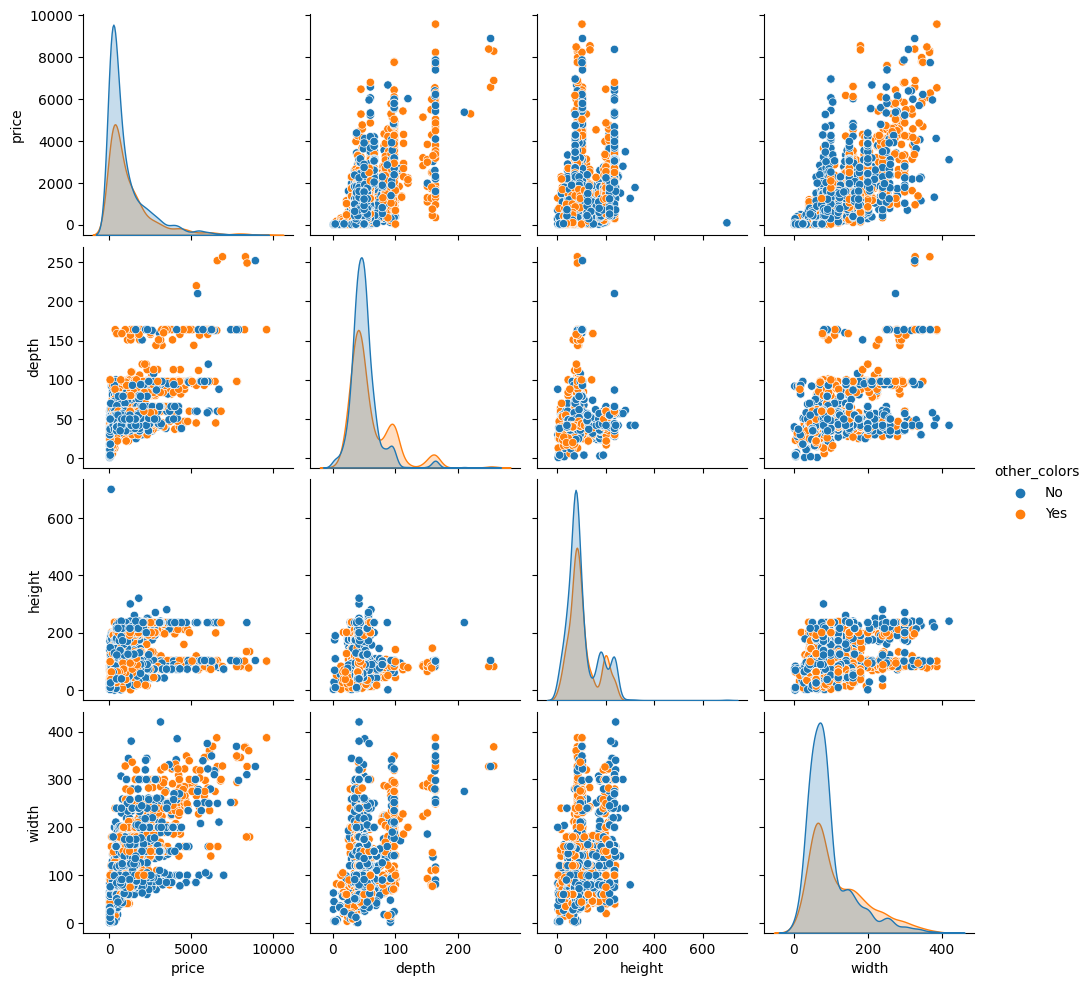

In [23]:
sns.pairplot(df[['price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors')

In [26]:
df1 = df.copy()

df1.dropna(inplace= True)

> #### **Testing hypotheses:**
>> ##### **Hypothesis 1:**
>> **Null hypothesis (H0):** The average price of furniture in the "Beds" category is equal to the average price in the "Sofas & armchairs" category.
>>
>> **Alternative hypothesis (H1):** The average prices in the two categories are different.

>
>> ##### **Hypothesis 2:**
>> **Null Hypothesis (H0):** The average price of furniture with one color is equal to the average price of furniture with several colors.
>>
>>**Alternative hypothesis (H1):** The average prices are different in this groups.

In [27]:
beds_prices = df1[df1['category'] == 'Beds']['price']
sofas_prices = df1[df1['category'] == 'Sofas & armchairs']['price']

In [28]:
t_statistic, p_value = stats.ttest_ind(beds_prices, sofas_prices)
print(f'Hypotesis 1: t-stat = {t_statistic}, p-val = {p_value}')

Hypotesis 1: t-stat = -1.558142543557497, p-val = 0.12025725684996647


In [36]:
if p_value < 0.05:
    print('Reject the null hypothesis: average prices differ')
else:
    print('There is insufficient evidence to reject the null hypothesis: average prices may be equal')

Reject the null hypothesis: average prices differ


In [29]:
df1['other_colors_1'] = df1['other_colors'].map(dict(Yes=1, No=0))

In [30]:
df1.head()

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width,other_colors_1
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,1
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0
5,5,INGOLF,Bar furniture,345.0,No old price,True,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0,0
6,6,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0,0
8,8,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0,0


In [37]:
no_col_prices = df1[df1['other_colors_1'] == 0]['price']
coloured_prices = df1[df1['other_colors_1'] == 1]['price']

In [40]:
t1_statistic, p1_value = stats.ttest_ind( no_col_prices, coloured_prices)
print(f'Hypotesis: t-stat = {t1_statistic}, p-val = {p1_value}')

Hypotesis: t-stat = -7.242333946555676, p-val = 6.381989191376669e-13


In [41]:
if p1_value < 0.05:
    print('Reject the null hypothesis: average prices differ')
else:
    print('There is insufficient evidence to reject the null hypothesis: average prices may be equal')

Reject the null hypothesis: average prices differ


>
> #### **Machine learning**
>

In [42]:
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    if not isinstance(value, str):
        return value
    
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    
    designers = value.split("/")
    
    if removeIKEA:
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        return '/'.join(sorted(designers))
    else:
        return emptyValue

In [43]:
df_2 = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col= 0).drop_duplicates()

df_2['designer_clean'] = df['designer'].apply(cleanDesigners, args= (False, "IKEA of Sweden"))

In [44]:
X = df_2[['depth', 'width', 'height', 'category', 'designer_clean', 'other_colors']]
Y = df_2['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer_clean', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)

print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.74147
MAE : 396.26201
MSE : 705.91036


To improve the model's training results, need more data or apply more sophisticated methods.